In [18]:
import numpy as np
import cv2
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import random
import keras
import tensorflow as tf
from keras.layers import Dense, Dropout,Flatten
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import keras
from sklearn.metrics import roc_curve, auc

In [2]:
Data_Directory = "dataset/training_set/"
Data_test_dir = "dataset/Test_set/"
Categ = ["cats", "dogs"]

In [3]:
training_set = []
testing_set = []
img_size = 50


def createTrainingSet():
    for category in Categ:  # do dogs and cats

        path = os.path.join(Data_Directory, category)
        classNO = Categ.index(category)  # get the classification  (0 or cnt 1).

        cnt = 0

        for img in tqdm(os.listdir(path)):
            try:
                if cnt == 1000:
                    break
                grayIMG = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array
                finalIMG = cv2.resize(grayIMG, (img_size, img_size))  # resize to normalize data size
                training_set.append([finalIMG, classNO])  # add this to our training_set
                cnt += 1
            except Exception as e:  # in the interest in keeping the output clean..
                pass


def createTestingSet():
    for category in Categ:

        path = os.path.join(Data_test_dir, category)
        classNo = Categ.index(category)  # get the classification  (0 or a 1).

        a = 0

        for img in tqdm(os.listdir(path)):
            try:
                if a == 200:
                    break
                grayIMG = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array
                finalIMG = cv2.resize(grayIMG, (img_size, img_size))  # resize to normalize data size
                testing_set.append([finalIMG, classNo])  # add this to our training_set
                a += 1
            except Exception as e:  # in the interest in keeping the output clean..
                pass


createTrainingSet()
createTestingSet()

print(len(training_set))
print(len(testing_set))

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 162.17it/s]

1000
200


In [4]:
import random

random.shuffle(training_set)

random.shuffle(testing_set)

In [5]:
X_train = []
y_train = []

X_test = []
y_test = []

for features,label in training_set:
    X_train.append(features)
    y_train.append(label)

for features,label in training_set:
    X_test.append(features)
    y_test.append(label)

X_train = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
print(X_train.shape)
print(y_train.shape)

(1000, 50, 50, 1)
(1000,)


"ann = tf.keras.models.Sequential()\n\nann.add(Flatten(input_shape=(IMG_SIZE, IMG_SIZE)))\n\nann.add(Dense(256, activation='relu'))\n\nann.add(Dropout(0.2))\n\nann.add(Dense(256, activation='relu'))\n\nann.add(Dense(1, activation='sigmoid'))\n\nann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])\n\nann.fit(X_train, y_train, batch_size = 32, epochs = 7,validation_split=0.2)"

In [6]:
X_train = np.array(X_train).reshape(-1, 2500 )
X_test = np.array(X_test).reshape(-1, 2500 )
print(X_train.shape)
print(X_test.shape)

(1000, 2500)
(1000, 2500)


In [7]:
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2500, activation='relu'))

model.add(tf.keras.layers.Dense(units=64, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)

historic =model.fit(X_train, y_train, batch_size = 32, epochs = 250,validation_split=0.2, verbose=1, callbacks=[checkpoint])


Epoch 1/250
25/25 [==============================] - ETA: 0s - loss: 1.3551 - accuracy: 0.4700
Epoch 00001: val_loss improved from inf to 0.70304, saving model to weights.h5
25/25 [==============================] - 2s 72ms/step - loss: 1.3551 - accuracy: 0.4700 - val_loss: 0.7030 - val_accuracy: 0.4500
Epoch 2/250
25/25 [==============================] - ETA: 0s - loss: 0.7257 - accuracy: 0.5337
Epoch 00002: val_loss did not improve from 0.70304
25/25 [==============================] - 2s 65ms/step - loss: 0.7257 - accuracy: 0.5337 - val_loss: 0.7772 - val_accuracy: 0.4850
Epoch 3/250
25/25 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.5425
Epoch 00003: val_loss did not improve from 0.70304
25/25 [==============================] - 2s 71ms/step - loss: 0.6894 - accuracy: 0.5425 - val_loss: 0.7392 - val_accuracy: 0.5350
Epoch 4/250
25/25 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.5612
Epoch 00004: val_loss improved from 0.70304 to 0.

25/25 [==============================] - ETA: 0s - loss: 0.4877 - accuracy: 0.7688
Epoch 00030: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 59ms/step - loss: 0.4877 - accuracy: 0.7688 - val_loss: 0.8119 - val_accuracy: 0.5650
Epoch 31/250
24/25 [===========================>..] - ETA: 0s - loss: 0.3439 - accuracy: 0.8529
Epoch 00031: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 54ms/step - loss: 0.3397 - accuracy: 0.8575 - val_loss: 0.8041 - val_accuracy: 0.5900
Epoch 32/250
24/25 [===========================>..] - ETA: 0s - loss: 0.3206 - accuracy: 0.8776
Epoch 00032: val_loss did not improve from 0.67546
25/25 [==============================] - 2s 63ms/step - loss: 0.3186 - accuracy: 0.8763 - val_loss: 0.8289 - val_accuracy: 0.5750
Epoch 33/250
25/25 [==============================] - ETA: 0s - loss: 0.2866 - accuracy: 0.8925
Epoch 00033: val_loss did not improve from 0.67546
25/25 [============================

Epoch 60/250
24/25 [===========================>..] - ETA: 0s - loss: 0.0946 - accuracy: 0.9740
Epoch 00060: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 48ms/step - loss: 0.0926 - accuracy: 0.9750 - val_loss: 1.5066 - val_accuracy: 0.5500
Epoch 61/250
25/25 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9800
Epoch 00061: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 50ms/step - loss: 0.0741 - accuracy: 0.9800 - val_loss: 1.3740 - val_accuracy: 0.5550
Epoch 62/250
25/25 [==============================] - ETA: 0s - loss: 0.1116 - accuracy: 0.9625
Epoch 00062: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 48ms/step - loss: 0.1116 - accuracy: 0.9625 - val_loss: 1.7895 - val_accuracy: 0.5900
Epoch 63/250
24/25 [===========================>..] - ETA: 0s - loss: 0.3023 - accuracy: 0.8646
Epoch 00063: val_loss did not improve from 0.67546
25/25 [===============

Epoch 90/250
25/25 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 00090: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 49ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.1249 - val_accuracy: 0.5450
Epoch 91/250
24/25 [===========================>..] - ETA: 0s - loss: 0.0057 - accuracy: 1.0000
Epoch 00091: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 49ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.0509 - val_accuracy: 0.5400
Epoch 92/250
25/25 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 00092: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 49ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.1485 - val_accuracy: 0.5500
Epoch 93/250
25/25 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 00093: val_loss did not improve from 0.67546
25/25 [===============

Epoch 120/250
24/25 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00120: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 51ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.4925 - val_accuracy: 0.5350
Epoch 121/250
25/25 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00121: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 50ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.4749 - val_accuracy: 0.5350
Epoch 122/250
25/25 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 00122: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 52ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.5046 - val_accuracy: 0.5400
Epoch 123/250
25/25 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 00123: val_loss did not improve from 0.67546
25/25 [===========

Epoch 149/250
25/25 [==============================] - ETA: 0s - loss: 7.1951e-04 - accuracy: 1.0000
Epoch 00149: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 55ms/step - loss: 7.1951e-04 - accuracy: 1.0000 - val_loss: 2.6847 - val_accuracy: 0.5450
Epoch 150/250
24/25 [===========================>..] - ETA: 0s - loss: 6.1872e-04 - accuracy: 1.0000
Epoch 00150: val_loss did not improve from 0.67546
25/25 [==============================] - 2s 72ms/step - loss: 6.2198e-04 - accuracy: 1.0000 - val_loss: 2.6937 - val_accuracy: 0.5400
Epoch 151/250
25/25 [==============================] - ETA: 0s - loss: 5.9673e-04 - accuracy: 1.0000 ETA: 0s - loss: 5.9393e-04 - ac
Epoch 00151: val_loss did not improve from 0.67546
25/25 [==============================] - 2s 65ms/step - loss: 5.9673e-04 - accuracy: 1.0000 - val_loss: 2.7601 - val_accuracy: 0.5450
Epoch 152/250
25/25 [==============================] - ETA: 0s - loss: 6.1063e-04 - accuracy: 1.0000
Epoch 001

Epoch 178/250
25/25 [==============================] - ETA: 0s - loss: 3.0299e-04 - accuracy: 1.0000
Epoch 00178: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 51ms/step - loss: 3.0299e-04 - accuracy: 1.0000 - val_loss: 2.8866 - val_accuracy: 0.5550
Epoch 179/250
25/25 [==============================] - ETA: 0s - loss: 3.0223e-04 - accuracy: 1.0000
Epoch 00179: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 54ms/step - loss: 3.0223e-04 - accuracy: 1.0000 - val_loss: 2.9215 - val_accuracy: 0.5500
Epoch 180/250
25/25 [==============================] - ETA: 0s - loss: 2.9479e-04 - accuracy: 1.0000
Epoch 00180: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 55ms/step - loss: 2.9479e-04 - accuracy: 1.0000 - val_loss: 2.9511 - val_accuracy: 0.5500
Epoch 181/250
25/25 [==============================] - ETA: 0s - loss: 2.9608e-04 - accuracy: 1.0000
Epoch 00181: val_loss did not improve fro

Epoch 207/250
24/25 [===========================>..] - ETA: 0s - loss: 1.6154e-04 - accuracy: 1.0000
Epoch 00207: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 50ms/step - loss: 1.6066e-04 - accuracy: 1.0000 - val_loss: 3.0917 - val_accuracy: 0.5500
Epoch 208/250
24/25 [===========================>..] - ETA: 0s - loss: 1.6394e-04 - accuracy: 1.0000
Epoch 00208: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 49ms/step - loss: 1.6456e-04 - accuracy: 1.0000 - val_loss: 3.1211 - val_accuracy: 0.5500
Epoch 209/250
25/25 [==============================] - ETA: 0s - loss: 1.5790e-04 - accuracy: 1.0000
Epoch 00209: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 51ms/step - loss: 1.5790e-04 - accuracy: 1.0000 - val_loss: 3.1048 - val_accuracy: 0.5450
Epoch 210/250
25/25 [==============================] - ETA: 0s - loss: 1.5361e-04 - accuracy: 1.0000
Epoch 00210: val_loss did not improve fro

Epoch 236/250
24/25 [===========================>..] - ETA: 0s - loss: 9.2727e-05 - accuracy: 1.0000
Epoch 00236: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 50ms/step - loss: 9.1644e-05 - accuracy: 1.0000 - val_loss: 3.3183 - val_accuracy: 0.5450
Epoch 237/250
25/25 [==============================] - ETA: 0s - loss: 9.1155e-05 - accuracy: 1.0000
Epoch 00237: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 49ms/step - loss: 9.1155e-05 - accuracy: 1.0000 - val_loss: 3.2931 - val_accuracy: 0.5450
Epoch 238/250
25/25 [==============================] - ETA: 0s - loss: 8.7559e-05 - accuracy: 1.0000
Epoch 00238: val_loss did not improve from 0.67546
25/25 [==============================] - 1s 47ms/step - loss: 8.7559e-05 - accuracy: 1.0000 - val_loss: 3.3330 - val_accuracy: 0.5450
Epoch 239/250
25/25 [==============================] - ETA: 0s - loss: 9.0434e-05 - accuracy: 1.0000
Epoch 00239: val_loss did not improve fro

In [9]:
print(model.evaluate(X_test, y_test))
print(model.metrics_names)

32/32 [==============================] - 0s 13ms/step - loss: 0.6736 - accuracy: 0.9100
[0.6736379265785217, 0.9100000262260437]
['loss', 'accuracy']


In [10]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[461  39]
 [ 51 449]]


0.91

In [26]:
#print(int(model.predict(new_array.reshape(1,2500))>0.5))


NameError: name 'new_array' is not defined

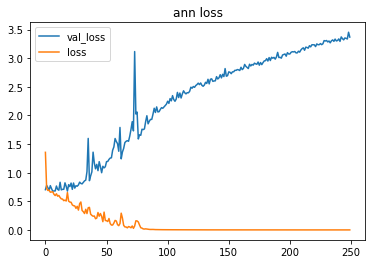

In [30]:
#plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_loss'])
#plt.plot(historic.history['val_accuracy'])
plt.plot(historic.history['loss'])
plt.title('ann loss')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
plt.legend(['val_loss','loss'], loc='upper left')
plt.show()

In [21]:
y_train_pred = model.predict(X_train)    
y_test_pred = model.predict(X_test)

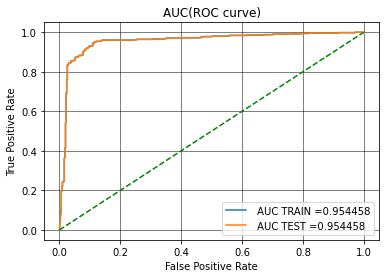

In [24]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.grid()
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()